In [1]:
__nbid__ = '0073'
__author__  = 'Benjamin Weaver <benjamin.weaver@noirlab.edu>, Alice Jacques <alice.jacques@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>, Astro Data Lab Team <datalab@noirlab.edu>'
__version__ = '20251205' # aaaammdd
__datasets__ = ['desi_dr1']
__keywords__ = ['query', 'DESI']

# Cómo consultar datos DESI DR1

#### (_Traducción de [How_to_query_DESI_DR1_Data.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/04_HowTos/QueryClient/How_to_query_DESI_DR1_Data.ipynb)_)

## Tabla de contenido

* [Objetivos](#Goals)
* [Resumen](#Summary)
* [Avisos legales y atribuciones](#attribution)
* [Configuración inicial](#Initial-Setup)
* [Autenticación](#auth)
* [Contenido de la Base de Datos](#Contents-of-the-Database)
* [Autenticación](#Authentication)
* [Consultas simples](#Simple-Queries)
* [Unir mesas](#Joining-Tables)
* [Coincidencia de tablas de desplazamiento al rojo con datos de orientación](#Matching-Redshift-Tables-to-Targeting-Data)
* [Progreso de el survey](#Survey-Progress)
* [Usando q3c](#Using-q3c)
* [Recursos y referencias](#Resources-and-References)

## Objetivos

Demostrar una variedad de consultas utilizando el conjunto de datos `desi_dr1`.

## Resumen

Este notebook cubrirá los conceptos básicos del uso de la base de datos de producción espectroscópica DESI, `desi_dr1`, que se carga desde las salidas del canal DESI. Este notebook está destinado a cubrir la mayor cantidad de detalles posible del [tutorial introductorio del notebook] de DESI (https://github.com/desihub/tutorials/blob/main/database/spectroscopic-production-database.ipynb), aunque reescrito para el entorno de Data Lab. Para obtener más detalles, incluidas descripciones detalladas de las tablas, consulte la [página de acceso a la base de datos] de DESI (https://data.desi.lbl.gov/doc/access/database/).

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----
# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.

## Configuración inicial

Esto simplemente importa todo lo que necesitamos y configura rutas y variables de entorno para que podamos encontrar cosas.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties
from dl import queryClient as qc, authClient as ac

# software DESI
from desitarget import __version__ as desitarget_version
from desitarget.targetmask import desi_mask

print(f"desitarget=={desitarget_version}")

desitarget==2.9.0


<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#from getpass import getpass
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

## Contenido de la Base de Datos

### Esquema

Todas las tablas están agrupadas en el esquema de base de datos `desi_dr1`.

### Notas importantes

* Esta base de datos no contiene ningún espectro del cielo. Se excluyen los espectros del cielo tanto dirigidos deliberadamente (`targetid & 2**59 != 0`) como negativos (`targetid < 0`).
* La tabla `ztile` *solo* contiene cantidades derivadas de espectros *acumulativos* basados ​​en mosaicos en este momento.
* Cada tabla siguiente tiene una clave principal y un "identificador único". En algunos casos, la clave principal y el identificador único son el mismo.
En otros casos, el identificador único es un conjunto de varias columnas y la clave principal es un valor arbitrario compuesto por esas columnas.
Por lo general, pero no siempre, el identificador único también tendrá un índice "ÚNICO" separado de la clave principal.

### Las tablas

* `photometry`. Este contiene los datos fotométricos puros. Por lo general, esto se deriva de los datos Tractor del LS DR9, pero no todos los objetos *seleccionados* tienen fotometría del Tractor.
  - Cargado desde archivos `tractorphot` en [lsdr9-photometry VAC](https://data.desi.lbl.gov/doc/releases/dr1/vac/lsdr9-photometry/): `/global/cfs/cdirs/desi/public/dr1/vac/dr1/lsdr9-photometry/iron/v1.1/potential-targets/tractorphot/tractorphot-potential-*-iron.fits`, https://data.desi.lbl.gov/public/dr1/vac/dr1/lsdr9-photometry/iron/v1.1/potential-targets/tractorphot/
  - Clave principal: `targetid`.
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#photometry).
* `target`. Contiene los bits de orientación y otros datos generados por "desitarget".
  - Cargado desde el archivo `targetphot` en el [lsdr9-photometry VAC](https://data.desi.lbl.gov/doc/releases/dr1/vac/lsdr9-photometry/): `/global/cfs/cdirs/desi/public/dr1/vac/dr1/lsdr9-photometry/iron/v1.1/potential-targets/targetphot-potential-*-iron.fits`, https://data.desi.lbl.gov/public/dr1/vac/dr1/lsdr9-photometry/iron/v1.1/potential-targets/
  - Identificador único: (`targetid`, `survey`, `tileid`).
  - Clave principal: `id`, un número entero único y arbitrario compuesto por (`targetid`, `survey`, `tileid`).
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#target).
* `tile`. Contiene información sobre observaciones agrupadas por mosaico.
  - Cargado desde `tiles-iron.fits` de nivel superior, https://data.desi.lbl.gov/public/dr1/spectro/redux/iron/tiles-iron.fits
  - Clave principal: `tileid`.
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#tile).
* `exposure`. Contiene información sobre exposiciones individuales.
  - Cargado desde `exposures-iron.fits` de nivel superior https://data.desi.lbl.gov/public/dr1/spectro/redux/iron/exposures-iron.fits, `EXPOSURES` HDU.
  - Clave principal: `expid`.
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#exposure).
* `frame`. Contiene información sobre exposiciones individuales, pero desglosada por cámara.  Por lo general, aunque no siempre, habrá 30 cuadros por exposición.
  - Cargado desde `exposures-iron.fits` de nivel superior, https://data.desi.lbl.gov/public/dr1/spectro/redux/iron/exposures-iron.fits, `FRAMES` HDU.
  - Identificador único: (`expid`, `camera`).
  - Clave primaria: `frameid`, compuesta por `expid` y una asignación de `camera` a un número entero arbitrario.
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#frame).
* `fiberassign`. Contiene información sobre las posiciones de las fibras.
  - Cargado desde archivos de fibra de asignación en el [producto de mosaicos](https://data.desi.lbl.gov/public/dr1/target/fiberassign/tiles/tags/1.1/).  Se cargan todos los archivos de asignación de fibra correspondientes a los mosaicos en la tabla "tile".
  - Identificador único: (`tileid`, `targetid`, `ubicación`).
  - Clave principal: `id`, un número entero único y arbitrario compuesto por (`tileid`, `targetid`, `location`).
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#fiberassign).
* `potential`. Contiene una lista de `targetid` que *podrían* haber sido apuntados en un mosaico determinado.
  - Cargado desde la HDU `POTENTIAL_ASSIGNMENTS` en los mismos archivos de asignación de fibra mencionados anteriormente.
  - Identificador único: (`tileid`, `targetid`, `ubicación`).
  - Clave principal: `id`, un número entero único y arbitrario compuesto por (`tileid`, `targetid`, `location`).
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#potential).
*`zpix`. Contiene los corrimientos al rojo de la canalización agrupados por HEALPixel.
  - Cargado desde la HDU `ZCATALOG` en el archivo de resumen `zall-pix`: `/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron/zcatalog/v1/zall-pix-iron.fits`, https://https://data.desi.lbl.gov/public/dr1/spectro/redux/iron/zcatalog/v1/zall-pix-iron.fits.
  - Identificador único: (`targetid`, `survey`, `program`).
  - Clave principal: `id`, un número entero único y arbitrario compuesto por (`targetid`, `survey`, `program`).
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#zpix).
* `ztile`. Contiene los desplazamientos al rojo del pipeline agrupados por mosaico de diversas formas.
  - Cargado desde la HDU `ZCATALOG` en el archivo de resumen `zall-tilecumulative`: `/global/cfs/cdirs/desi/public/dr1/spectro/redux/iron/zcatalog/v1/zall-tilecumulative-iron.fits`, https://https://data.desi.lbl.gov/public/dr1/spectro/redux/iron/zcatalog/v1/zall-tilecumulative-iron.fits.
  - Identificador único: (`targetid`, `spgrp`, `spgrpval`, `tileid`).
  - Clave principal: `id`, un número entero único y arbitrario compuesto por (`targetid`, `spgrp`, `spgrpval`, `tileid`).
  - [Descripciones de columnas](https://data.desi.lbl.gov/doc/access/database/#ztile).

### Relaciones de clave externa

* `desi_dr1.target.targetid` -> `desi_dr1.photometry.targetid`.
* `desi_dr1.target.tileid` -> `desi_dr1.tile.tileid`.
* `desi_dr1.exposure.tileid` -> `desi_dr1.tile.tileid`.
* `desi_dr1.frame.expid` -> `desi_dr1.exposure.expid`.
* `desi_dr1.fiberassign.targetid` -> `desi_dr1.photometry.targetid`.
* `desi_dr1.fiberassign.tileid` -> `desi_dr1.tile.tileid`.
* `desi_dr1.potential.targetid` -> `desi_dr1.photometry.targetid`.
* `desi_dr1.potential.tileid` -> `desi_dr1.tile.tileid`.
* `desi_dr1.zpix.targetid` -> `desi_dr1.photometry.targetid`.
* `desi_dr1.ztile.targetphotid` -> `desi_dr1.target.id`.
* `desi_dr1.ztile.targetid` -> `desi_dr1.photometry.targetid`.
* `desi_dr1.ztile.tileid` -> `desi_dr1.tile.tileid`.

## Consultas simples

En la mayoría de los ejemplos siguientes, incluimos el comando SQL sin formato equivalente que corresponde a la consulta.

### Exposiciones, Noches, Mosaicos

Aquí hay algunas consultas simples que demuestran conexiones simples entre noches, exposiciones y mosaicos.

#### ¿Cuántas mosaicos hay?

```SQL
SELECT COUNT(tileid) FROM desi_dr1.tile;
```

In [4]:
response = qc.query(sql='SELECT COUNT(tileid) FROM desi_dr1.tile;', fmt='pandas', timeout=600)
response

,count
0,6101


#### ¿En qué noches se observó un mosaico en particular?

```SQL
SELECT night, expid FROM desi_dr1.exposure WHERE tileid = 100;
```

In [5]:
response = qc.query(sql='SELECT night, expid FROM desi_dr1.exposure WHERE tileid = 100;', fmt='pandas', timeout=600)
response

,night,expid
0,20210504,87236
1,20210505,87361


#### ¿Qué mosaicos se observaron en una noche?

Una noche de observación DESI está representada por un número entero con el formato `AAAAMMDD`.
```SQL
SELECT tileid, survey, program FROM desi_dr1.exposure WHERE night = 20210115;
```

In [6]:
response = qc.query(sql='SELECT tileid, survey, program FROM desi_dr1.exposure WHERE night = 20210115;', fmt='pandas', timeout=600)
response

,tileid,survey,program
0,80655,sv1,bright
1,80680,sv1,dark
2,80680,sv1,dark
3,80660,sv1,bright
4,80660,sv1,bright
5,80715,sv1,other
6,80715,sv1,other
7,80715,sv1,other
8,80674,sv1,dark
9,80674,sv1,dark


### Seleccionar objetivos ELG

A continuación se muestra una demostración sencilla de cómo encontrar objetivos específicos utilizando los valores de máscara de bits de la selección. En este caso `desi_mask.ELG == 2**1`.

```SQL
SELECT * from desi_dr1.target WHERE (desi_target & 2) != 0;
```

In [7]:
q = f"SELECT * FROM desi_dr1.target WHERE (desi_target & {desi_mask.ELG:d}) != 0 LIMIT 10;"
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,id,subpriority,targetid,cmx_target,desi_target,bgs_target,mws_target,sv1_desi_target,sv1_bgs_target,sv1_mws_target,...,sv3_scnd_target,priority_init,hpxpixel,obsconditions,numobs_init,tileid,random_id,photsys,survey,program
0,475369083497140574386628075230,0.739844,39627634329525982,0,1179778,0,0,0,0,0,...,0,3000,17612,1,2,5877,73.887370,S,main,dark
1,475369083497140574374607193795,0.960347,39627622308644547,0,1179778,0,0,0,0,0,...,0,3000,17612,1,2,5877,31.244118,S,main,dark
2,475369083497140574386615491389,0.973448,39627634316942141,0,655394,0,0,0,0,0,...,0,3100,17614,1,2,5877,43.011210,S,main,dark
3,475369092499151682399218174228,0.752269,39627676658436372,0,655394,0,0,0,0,0,...,0,3100,17691,1,2,6365,34.298016,S,main,dark
4,475369092646725634928714714394,0.777067,39627616478563610,0,655394,0,0,0,0,0,...,0,3100,17675,1,2,6373,46.242233,S,main,dark
5,475369092683619122951005151212,0.455139,39627491349897196,0,655394,0,0,0,0,0,...,0,3100,17477,1,2,6375,5.799649,S,main,dark
6,475369092683619122974656832715,0.829440,39627515001578699,0,655394,0,0,0,0,0,...,0,3100,17479,1,2,6375,29.812014,S,main,dark
7,475369093089447492727754198391,0.400722,39627646488808823,0,655394,0,0,0,0,0,...,0,3100,17699,1,2,6397,88.789246,S,main,dark
8,475369093089447492751850472129,0.317057,39627670585082561,0,655394,0,0,0,0,0,...,0,3100,17702,1,2,6397,59.450203,S,main,dark
9,475369093144787725087663985665,0.316611,39627785269941249,0,655394,0,0,0,0,0,...,0,3100,17815,1,2,6400,26.993572,S,main,dark


#### Ejercicio

* ¿Cuántos objetos en la tabla `zpix` tienen `spectype` 'GALAXY'?

### Corrimiento al rojo y clasificación

Filtrado de consultas simple sobre valores de cadena. Hay muchas estrellas, por lo que esta consulta tiene un "LÍMITE 20".

```SQL
SELECT spectype, subtype, z FROM desi_dr1.zpix WHERE spectype = 'STAR' AND subtype != '' LIMIT 20;
```

In [8]:
response = qc.query(sql="SELECT spectype, subtype, z FROM desi_dr1.zpix WHERE spectype = 'STAR' AND subtype != '' LIMIT 20;", fmt='pandas', timeout=600)
response

,spectype,subtype,z
0,STAR,K,-0.000457
1,STAR,K,0.000141
2,STAR,K,-0.000677
3,STAR,K,-0.000114
4,STAR,G,-0.000216
5,STAR,G,-0.000736
6,STAR,K,-0.000126
7,STAR,K,-0.000028
8,STAR,K,0.000163
9,STAR,K,-0.000125


## Unir tablas

### Una unión sencilla

Veamos las noches y exposiciones en las que se observó un `TARGETID` en particular.

```SQL
SELECT f.tileid, e.expid, e.night FROM desi_dr1.fiberassign AS f JOIN desi_dr1.exposure AS e ON f.tileid = e.tileid WHERE f.targetid = 933811403620352;
```

In [9]:
q = """SELECT f.tileid, e.expid, e.night
FROM desi_dr1.fiberassign AS f
JOIN desi_dr1.exposure AS e ON f.tileid = e.tileid
WHERE f.targetid = 933811403620352;"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,tileid,expid,night
0,280,86980,20210502
1,280,86981,20210502
2,278,85086,20210416
3,279,85206,20210417
4,279,85207,20210417
5,279,85209,20210417
6,279,85208,20210417


### Otra unión sencilla

En este caso, veremos el flujo fotométrico y el corrimiento al rojo medido. Vamos a `ORDER`(`BY`) (_ordenar por_) los resultados y `LIMIT` (_limitaremos_)la consulta para mantener los números manejables.

```SQL
SELECT p.*, z.* FROM desi_dr1.photometry AS p JOIN desi_dr1.zpix AS z ON p.targetid = z.targetid ORDER BY z.z, p.flux_g LIMIT 50;
```

In [10]:
q = """SELECT p.*, z.*
FROM desi_dr1.photometry AS p
JOIN desi_dr1.zpix AS z ON p.targetid = z.targetid
ORDER BY z.z, p.flux_g LIMIT 50;
"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,ra,dec,elon,elat,glon,glat,ls_id,ref_id,targetid,ra_ivar,...,zcat_nspec,sv_primary,main_primary,zcat_primary,survey,program,spgrp,spectype,subtype,desiname
0,257.953191,46.280139,246.557210,68.741199,72.090662,36.057190,9907736640227576,0,39633188301048056,1.067181e+10,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J257.9531+46.2801
1,135.711140,6.837616,136.120977,-9.587359,222.435743,32.251857,9906623996694120,0,39627949812485736,1.919160e+09,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J135.7111+06.8376
2,150.371602,7.791297,149.697227,-4.040197,230.548562,45.402127,9906624375425368,0,39627974051367256,5.519550e+09,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J150.3716+07.7912
3,40.971578,12.259112,42.340747,-3.443103,161.281798,-42.088174,9906626021688455,0,39628079412282503,7.844628e+09,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J040.9715+12.2591
4,202.698735,-1.873469,201.696174,7.089512,322.589117,59.487831,9906620809745324,0,39627745847677868,5.001052e+11,...,1,f,t,t,main,bright,healpix,GALAXY,NaN,DESI J202.6987-01.8734
5,129.118610,8.422509,129.304533,-9.840067,217.392715,27.148664,9906624650480322,0,39627991654861506,3.208116e+09,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J129.1186+08.4225
6,267.246574,18.550756,266.488969,41.956501,43.284638,21.848392,9906628355757656,0,39628228792424024,1.028298e+10,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J267.2465+18.5507
7,241.507411,42.989492,222.397163,61.802210,68.072032,47.819167,9907735761913526,0,39633132088985270,2.250990e+09,...,1,t,f,t,sv3,dark,healpix,GALAXY,NaN,DESI J241.5074+42.9894
8,179.341060,2.774747,178.291253,2.283592,272.643618,62.423091,9906622502340273,0,39627854173963953,1.431697e+10,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J179.3410+02.7747
9,195.208231,36.401416,176.879914,38.936372,111.384836,80.515251,9907733862613017,0,39633010533859353,3.398441e+09,...,1,f,t,t,main,dark,healpix,GALAXY,NaN,DESI J195.2082+36.4014


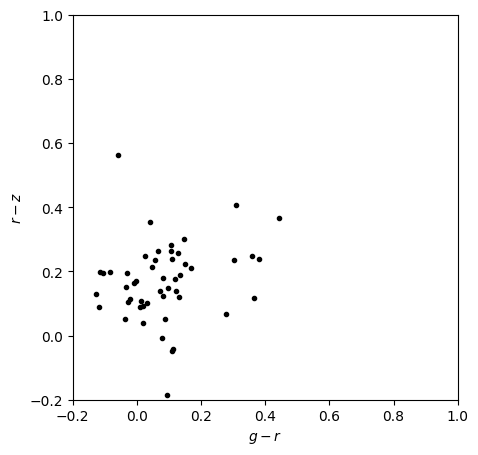

In [11]:
# Evite advertencias sobre valores no válidos en np.log10().
w = (response.flux_g.values > 0) & (response.flux_r.values > 0)
g_minus_r = np.log10(response.flux_r.values[w]/response.flux_g.values[w])
r_minus_z = np.log10(response.flux_z.values[w]/response.flux_r.values[w])
redshift = np.array(response.z.values[w])
fig, axes = plt.subplots(1, 1, figsize=(5, 5), dpi=100)
p = axes.plot(g_minus_r, r_minus_z, 'k.')
foo = axes.set_xlim([-0.2, 1.0])
foo = axes.set_ylim([-0.2, 1.0])
foo = axes.set_aspect('equal')
foo = axes.set_xlabel('$g-r$')
foo = axes.set_ylabel('$r-z$')

#### Ejercicio

* Crear un gráfico color-color para objetos seleccionados como QSO y confirmados espectroscópicamente como tales.

### Una unión más complicada

Veamos los objetos que aparecen en más de un mosaico. Para cada uno de esos mosaicos, ¿cuántas exposiciones hubo?

En este ejemplo, utilizamos una sub-consulta que en sí misma es una combinación de varias tablas.

```SQL
SELECT t.nexp, f.tileid, q1.targetid, q1.n_assign FROM desi_dr1.fiberassign AS f
    JOIN (SELECT ff.targetid, COUNT(*) AS n_assign FROM desi_dr1.fiberassign AS ff GROUP BY ff.targetid) AS q1 ON f.targetid = q1.targetid
    JOIN desi_dr1.tile AS t ON f.tileid = t.tileid LIMIT 100;
```

In [12]:
q = """SELECT t.nexp, f.tileid, q1.targetid, q1.n_assign
FROM desi_dr1.fiberassign AS f
JOIN (SELECT ff.targetid, COUNT(*) AS n_assign FROM desi_dr1.fiberassign AS ff GROUP BY ff.targetid) AS q1 ON f.targetid = q1.targetid
JOIN desi_dr1.tile AS t ON f.tileid = t.tileid LIMIT 100;
"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,nexp,tileid,targetid,n_assign
0,7,80856,6432023904256,1
1,7,80856,6448025174016,1
2,3,80876,6515536691200,1
3,4,80889,6521555517440,2
4,2,80890,6521555517440,2
...,...,...,...,...
95,3,80715,28684333350912,1
96,3,80715,28684333350916,1
97,3,80715,28684333350917,1
98,3,80715,28684333350925,1


Ahora veamos cuál cree la tabla de corrimiento al rojo que es el número de exposiciones para estos objetos.

```SQL
SELECT z.* FROM desi_dr1.zpix AS z WHERE z.targetid IN (6432023904256, 6448025174016[, ...]);
```

In [13]:
q3 = """SELECT z.* FROM desi_dr1.zpix AS z
WHERE z.targetid IN ({0});
""".format(', '.join(map(str, response.targetid.values.tolist())))
response3 = qc.query(sql=q3, fmt='pandas', timeout=600)
response3

,id,z,zerr,chi2,coeff_0,coeff_1,coeff_2,coeff_3,coeff_4,coeff_5,...,zcat_nspec,sv_primary,main_primary,zcat_primary,survey,program,spgrp,spectype,subtype,desiname
0,237684487598133251433784410112,0.932752,2.232146e-46,9.000000e+99,76.611660,65.070679,6.066069,-5.626323,-0.165124,1.316324,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J179.4441+27.6589
1,237684487598133251449785679872,0.022191,9.394451e-06,8.641642e+03,390.337409,-396.225587,-2577.195338,-1092.529252,917.026494,-1439.203374,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J179.1565+28.4234
2,237684487598133251517297197056,1.512890,1.279211e-04,8.427743e+03,66.090854,-210.692491,73.032396,-57.340782,1.920261,-3.050883,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J142.9481+31.8247
3,237684487598133251523316023296,0.010016,1.957488e-05,8.291875e+03,72.259035,52.926847,2.871677,-0.526837,2.488005,0.141895,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J204.2274+32.0949
4,237684487598133251538398740480,0.076414,9.322458e-06,7.929244e+03,146.019077,84.520675,16.011045,-22.302343,-0.862430,2.551037,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J186.2741+32.8450
5,237684487598133251547793981440,0.026941,3.708266e-05,9.069646e+03,96.456299,-72.068968,59.171696,-60.931051,-6.866817,-0.570055,...,1,t,f,t,sv1,dark,healpix,GALAXY,NaN,DESI J132.6621+33.1677
6,316912650112397611279616835587,-0.000514,3.854211e-06,9.103074e+03,160.896637,-159.803309,-1085.713206,-467.606616,1002.957660,-210.170365,...,1,t,f,t,sv1,other,healpix,STAR,G,DESI J009.1457+41.0190
7,316912650112397611279616835588,0.188356,2.417330e-05,9.524589e+03,38.535705,1.661111,-2.247773,4.912908,-0.882208,5.260303,...,1,t,f,t,sv1,other,healpix,GALAXY,NaN,DESI J009.0009+40.9388
8,316912650112397611279621029889,0.080799,1.013322e-05,1.098089e+04,13.006690,-55.897863,-149.935519,-73.793308,131.722114,-87.241382,...,1,t,f,t,sv1,other,healpix,GALAXY,NaN,DESI J009.3969+40.9645


#### Ejercicio

* ¿Cuál es la distribución del número de exposiciones?

## Coincidir tablas de desplazamiento al rojo con datos de selección

Hacer coincidir los resultados del corrimiento al rojo con la selección es una tarea importante para muchos proyectos científicos de DESI. A continuación describimos brevemente los fundamentos de este coincidir utilizando la base de datos.

### Basado en mosaicos

La tabla `ztile` contiene una clave externa que apunta a la clave principal de la tabla `target`. Esto significa que para cualquier fila de `ztile`, hay una entrada previamente coincidente en la tabla `target` y se puede acceder a ella con una combinación simple, como por ejemplo:
```SQL
SELECT z.targetid, z.spgrp, z.spgrpval, z.tileid, z.z, z.zwarn, z.spectype,
    t.sv1_desi_target, t.sv1_bgs_target, t.sv1_mws_target, t.sv1_scnd_target,
    p.ra, p.dec
FROM desi_dr1.ztile AS z
JOIN desi_dr1.target AS t ON z.targetphotid = t.id
JOIN desi_dr1.photometry AS p ON z.targetid = p.targetid
LIMIT 50;
```
Tenga en cuenta `z.targetphotid = t.id`. Esta consulta también demuestra una UNIÓN con la tabla `photometry`, donde `targetid` es único.

In [14]:
q = """SELECT z.targetid, z.spgrp, z.spgrpval, z.tileid, z.z, z.zwarn, z.spectype,
    t.sv1_desi_target, t.sv1_bgs_target, t.sv1_mws_target, t.sv1_scnd_target,
    p.ra, p.dec
FROM desi_dr1.ztile AS z
JOIN desi_dr1.target AS t ON z.targetphotid = t.id
JOIN desi_dr1.photometry AS p ON z.targetid = p.targetid
LIMIT 50;"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,targetid,spgrp,spgrpval,tileid,z,zwarn,spectype,sv1_desi_target,sv1_bgs_target,sv1_mws_target,sv1_scnd_target,ra,dec
0,6432023904256,cumulative,20210318,80856,0.932752,518,GALAXY,4611686018427387904,0,0,2,179.444160,27.658900
1,6448025174016,cumulative,20210318,80856,0.022191,0,GALAXY,4611686018427387904,0,0,2,179.156570,28.423480
2,6515536691200,cumulative,20210320,80876,1.512890,0,GALAXY,4611686018427387904,0,0,2,142.948110,31.824780
3,6521555517440,cumulative,20210404,80889,0.010025,0,GALAXY,4611686018427387904,0,0,2,204.227490,32.094930
4,6521555517440,cumulative,20210404,80890,0.010048,0,GALAXY,4611686018427387904,0,0,2,204.227490,32.094930
5,6536638234624,cumulative,20210402,80885,0.076402,0,GALAXY,4611686018427387904,0,0,2,186.274119,32.845030
6,6536638234624,cumulative,20210403,80886,0.076406,0,GALAXY,4611686018427387904,0,0,2,186.274119,32.845030
7,6546033475584,cumulative,20210319,80689,0.026941,0,GALAXY,4611686018427387904,0,0,2,132.662110,33.167730
8,28684312379395,cumulative,20210115,80715,-0.000514,0,STAR,4611686018427387904,0,0,64,9.145797,41.019015
9,28684312379396,cumulative,20210115,80715,0.188356,0,GALAXY,4611686018427387904,0,0,64,9.000947,40.938849


### Basado en HEALPixel

Los resultados del corrimiento al rojo de los coadds basados en HEALPixel en la tabla `zpix` pueden estar compuestos por varios mosaicos, por lo que no es tan sencillo compararlos con los datos de selección. En la mayoría de los casos, la información de selección es la misma para un `targetid` en varios mosaicos, siempre y cuando los mosaicos formen parte del mismo survey (*e.g.* `sv1`). Sin embargo, no *siempre* es así, por lo que hemos recopilado los mejores valores de la información de orientación y los hemos colocado directamente en la tabla `zpix`. Aquí está la consulta análoga a la consulta anterior:
```SQL
SELECT z.targetid, z.survey, z.program, z.healpix, z.z, z.zwarn, z.spectype,
    z.sv1_desi_target, z.sv1_bgs_target, z.sv1_mws_target, z.sv1_scnd_target,
    p.ra, p.dec
FROM desi_dr1.zpix AS z
JOIN desi_dr1.photometry AS p ON z.targetid = p.targetid
LIMIT 50;
```

In [15]:
q = """SELECT z.targetid, z.survey, z.program, z.healpix, z.z, z.zwarn, z.spectype,
    z.sv1_desi_target, z.sv1_bgs_target, z.sv1_mws_target, z.sv1_scnd_target,
    p.ra, p.dec
FROM desi_dr1.zpix AS z
JOIN desi_dr1.photometry AS p ON z.targetid = p.targetid
LIMIT 50;"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,targetid,survey,program,healpix,z,zwarn,spectype,sv1_desi_target,sv1_bgs_target,sv1_mws_target,sv1_scnd_target,ra,dec
0,6432023904256,sv1,dark,28473,0.932752,518,GALAXY,4611686018427387904,0,0,2,179.444160,27.658900
1,6448025174016,sv1,dark,28478,0.022191,0,GALAXY,4611686018427387904,0,0,2,179.156570,28.423480
2,6515536691200,sv1,dark,4958,1.512890,0,GALAXY,4611686018427387904,0,0,2,142.948110,31.824780
3,6521555517440,sv1,dark,10436,0.010016,0,GALAXY,4611686018427387904,0,0,2,204.227490,32.094930
4,6536638234624,sv1,dark,28534,0.076414,0,GALAXY,4611686018427387904,0,0,2,186.274119,32.845030
5,6546033475584,sv1,dark,5066,0.026941,0,GALAXY,4611686018427387904,0,0,2,132.662110,33.167730
6,28684312379395,sv1,other,2708,-0.000514,0,STAR,4611686018427387904,0,0,64,9.145797,41.019015
7,28684312379396,sv1,other,2707,0.188356,0,GALAXY,4611686018427387904,0,0,64,9.000947,40.938849
8,28684316573697,sv1,other,2708,0.080799,0,GALAXY,4611686018427387904,0,0,64,9.396960,40.964540
9,28688884170754,sv1,other,2710,0.190202,0,GALAXY,4611686018427387904,0,0,64,9.132197,41.194937


## Progreso del Survey

Veamos qué noches tienen datos y contemos el número de exposiciones por noche.

```SQL
SELECT e.night, COUNT(e.expid) AS n_exp FROM desi_dr1.exposure AS e GROUP BY e.night ORDER BY e.night;
```

In [16]:
q = "SELECT e.night, COUNT(e.expid) AS n_exp FROM desi_dr1.exposure AS e GROUP BY e.night ORDER BY e.night;"
night_exposures = qc.query(sql=q, fmt='pandas', timeout=600)
night_exposures

,night,n_exp
0,20201214,17
1,20201215,23
2,20201216,24
3,20201217,7
4,20201218,27
...,...,...
368,20220609,16
369,20220610,15
370,20220611,21
371,20220612,29


Marca de tiempo de observación para una noche determinada.  Observe que tenemos tanto MJD como un objeto `datetime.datetime` correspondiente en la base de datos.

```SQL
SELECT e.expid, e.mjd, e.date_obs FROM desi_dr1.exposure AS e WHERE e.night = 20210428 ORDER BY e.expid;
```

In [17]:
q = "SELECT e.expid, e.mjd, e.date_obs FROM desi_dr1.exposure AS e WHERE e.night = 20210428 ORDER BY e.expid;"
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,expid,mjd,date_obs
0,86493,59333.216755,2021-04-28 22:12:07.607808-07
1,86494,59333.223580,2021-04-28 22:21:57.3336-07
2,86495,59333.231531,2021-04-28 22:33:24.31296-07
3,86503,59333.309867,2021-04-29 00:26:12.514848-07
4,86504,59333.327059,2021-04-29 00:50:57.902784-07
5,86505,59333.331919,2021-04-29 00:57:57.783456-07
6,86507,59333.379902,2021-04-29 02:07:03.564768-07
7,86508,59333.386287,2021-04-29 02:16:15.176064-07
8,86509,59333.392383,2021-04-29 02:25:01.863552-07
9,86511,59333.402576,2021-04-29 02:39:42.52752-07


Entonces, para un objetivo determinado en la tabla `target`, ¿cuándo se completó la observación? En otras palabras, si un objetivo tiene múltiples observaciones, queremos la fecha de la *última* observación. Primero, ¿cuántos objetivos hay?

```SQL
SELECT COUNT(*) AS n_targets FROM desi_dr1.target;
```

In [18]:
q = "SELECT COUNT(*) AS n_targets FROM desi_dr1.target;"
N_targets = qc.query(sql=q, fmt='pandas', timeout=600)
N_targets

,n_targets
0,151418861


Ahora buscamos objetivos que tengan observaciones y encontramos el MJD de la observación.

```SQL
SELECT f.targetid, e.expid, e.mjd FROM desi_dr1.fiberassign AS f
    JOIN (SELECT tt.targetid FROM desi_dr1.target AS tt JOIN desi_dr1.fiberassign AS ff ON tt.targetid = ff.targetid
              JOIN desi_dr1.exposure AS ee ON ff.tileid = ee.tileid GROUP BY tt.targetid) AS q1 ON f.targetid = q1.targetid
    JOIN desi_dr1.exposure AS e ON f.tileid = e.tileid ORDER BY q1.targetid, e.expid;
```

Tenga en cuenta que esto consta de una consulta interna, `(SELECT tt.targetid FROM desi_dr1.target AS tt ...) AS q1` y una consulta externa que trata `q1` como si fuera una tabla. En algunos casos, podemos ejecutar esta consulta exactamente como se escribió anteriormente, pero debido a limitaciones de tiempo, dividiremos esta consulta y la ejecutaremos de forma asincrónica, guardando los resultados intermedios en una tabla MyDB.

In [19]:
#
# Limpia cualquier tabla intermedia existente.
#
overwrite_q1_table = False
q1_table = 'desi_dr1_survey_progress_q1'
mydb_tables = qc.mydb_list().split('\n')
if q1_table in mydb_tables and not overwrite_q1_table:
    print(f"Usando la tabla de progreso de el survey existente {q1_table}.")
else:
    qc.mydb_drop('desi_dr1_survey_progress_q1')
    #
    # Encuentre todos los objetivos que tengan observaciones.
    #
    q1 = """SELECT tt.targetid FROM desi_dr1.target AS tt JOIN desi_dr1.fiberassign AS ff ON tt.targetid = ff.targetid
        JOIN desi_dr1.exposure AS ee ON ff.tileid = ee.tileid GROUP BY tt.targetid;"""
    response = qc.query(sql=q1, out=f'mydb://{q1_table}', async_=True, wait=True, poll=60, verbose=True, timeout=6000)
    print(response)
#
# Encuentre las fechas de exposición (MJD) para los objetivos que se han observado
#
q2 = f"""SELECT f.targetid, e.expid, e.mjd FROM desi_dr1.fiberassign AS f
    JOIN mydb://{q1_table} AS q1 ON f.targetid = q1.targetid
    JOIN desi_dr1.exposure AS e ON f.tileid = e.tileid ORDER BY q1.targetid, e.expid;"""
response = qc.query(sql=q2, fmt='pandas', async_=True, wait=True, poll=60, verbose=True, timeout=6000)
targetid = response.targetid.values
expid = response.expid.values
mjd = response.mjd.values
#
# Utilice las cuentas para dar la *última* observación.
#
unique_targetid, i, j, c = np.unique(targetid, return_index=True, return_inverse=True, return_counts=True)
unique_expid = expid[i + (c-1)]
unique_mjd = mjd[i + (c-1)]

Usando la tabla de progreso de el survey existente desi_dr1_survey_progress_q1.
EXECUTING
Status = EXECUTING; elapsed time: 60, timeout in 5940
EXECUTING
Status = EXECUTING; elapsed time: 120, timeout in 5880
EXECUTING
Status = EXECUTING; elapsed time: 180, timeout in 5820
EXECUTING
Status = COMPLETED; elapsed time: 240, timeout in 5760
Retrieving results

Total time: 3.54s for 1.39 GB


Ahora tenemos los objetivos y la fecha de la última observación.  Pero está ordenado por `targetid`.

In [20]:
ii = unique_expid.argsort()
unique_targetid, i3, j3, c3 = np.unique(unique_expid[ii], return_index=True, return_inverse=True, return_counts=True)
N_completed = np.cumsum(c3)

Ahora graficamos la fracción completada versus el tiempo.  Además, mostramos el número de exposiciones por noche.

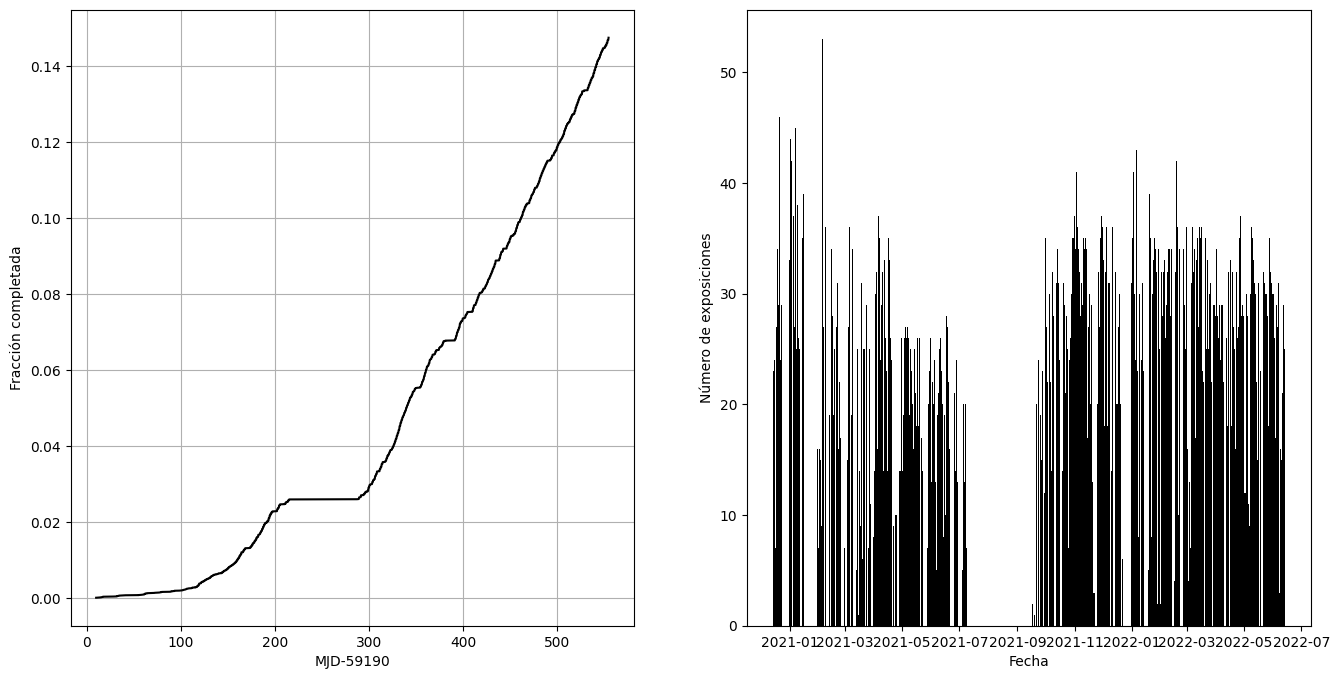

In [21]:
min_mjd = 10*(int(mjd.min())//10)
fig, axes = plt.subplots(1, 2, figsize=(16, 8), dpi=100)
p1 = axes[0].plot(unique_mjd[ii][i3] - min_mjd, N_completed/N_targets.n_targets.values[0], 'k-')
foo = axes[0].set_xlabel(f'MJD-{min_mjd:d}')
foo = axes[0].set_ylabel('Fracción completada')
foo = axes[0].grid(True)
foo = axes[1].bar(pd.to_datetime(night_exposures['night'],format="%Y%m%d"), night_exposures['n_exp'], color='black', width=1)
foo = axes[1].set_xlabel('Fecha')
foo = axes[1].set_ylabel('Número de exposiciones')

### Ejercicio

* Desglose el progreso por clase de destino, bit de destino, etc.

## Usando q3c

[q3c](https://github.com/segasai/q3c) ([Koposov & Bartunov 2006](https://ui.adsabs.harvard.edu/abs/2006ASPC..351..735K/abstract)) es una biblioteca popular que proporciona indexación espacial y búsqueda en bases de datos astronómicas. Aquí demostraremos cómo acceder a esta funcionalidad. Esta es una búsqueda radial ("cono") en un punto arbitrario en la huella DESI:

```SQL
SELECT p.*, z.*, q3c_dist(p.ra, p.dec, 180.0, 0.0) AS radial_distance
    FROM desi_dr1.photometry AS p JOIN desi_dr1.zpix AS z ON p.targetid = z.targetid
    WHERE q3c_radial_query(p.ra, p.dec, 180.0, 0.0, 1.0/60.0); -- 1 minuto de arco
```

In [22]:
q = """SELECT p.*, z.*, q3c_dist(p.ra, p.dec, 180.0, 0.0) AS radial_distance
    FROM desi_dr1.photometry AS p JOIN desi_dr1.zpix AS z ON p.targetid = z.targetid
    WHERE q3c_radial_query(p.ra, p.dec, 180.0, 0.0, 1.0/60.0);"""
response = qc.query(sql=q, fmt='pandas', timeout=600)
response

,ra,dec,elon,elat,glon,glat,ls_id,ref_id,targetid,ra_ivar,...,sv_primary,main_primary,zcat_primary,survey,program,spgrp,spectype,subtype,desiname,radial_distance
0,179.995221,-0.014803,180.001510,-0.015482,276.340328,60.173070,9906621464385242,3602879637472757504,39627787744581338,6.673339e+11,...,f,f,f,sv1,dark,healpix,QSO,HIZ,DESI J179.9952000.-148,0.015555
1,179.995221,-0.014803,180.001510,-0.015482,276.340328,60.173070,9906621464385242,3602879637472757504,39627787744581338,6.673339e+11,...,f,t,f,main,dark,healpix,QSO,HIZ,DESI J179.9952000.-148,0.015555
2,179.995221,-0.014803,180.001510,-0.015482,276.340328,60.173070,9906621464385242,3602879637472757504,39627787744581338,6.673339e+11,...,t,f,t,sv3,dark,healpix,QSO,HIZ,DESI J179.9952000.-148,0.015555
3,179.985112,-0.004522,179.988146,-0.010071,276.313447,60.178470,9906621464384989,3795033274544636416,2305843037487501690,3.458816e+14,...,t,f,t,sv3,backup,healpix,STAR,K,DESI J179.9851000.-45,0.015560
4,179.984545,-0.001041,179.986241,-0.007102,276.309610,60.181437,9906621464384972,3795033278840733568,39627787744581068,2.056779e+15,...,t,f,t,sv3,bright,healpix,GALAXY,NaN,DESI J179.9845000.-10,0.015490
5,179.998583,-0.016184,180.005144,-0.015412,276.347634,60.173143,9906621464385323,0,39627787744581419,2.511551e+12,...,f,t,f,main,bright,healpix,GALAXY,NaN,DESI J179.9985000.-161,0.016246
6,179.998583,-0.016184,180.005144,-0.015412,276.347634,60.173143,9906621464385323,0,39627787744581419,2.511551e+12,...,t,f,t,sv3,bright,healpix,GALAXY,NaN,DESI J179.9985000.-161,0.016246
7,179.983454,-0.001613,179.985468,-0.008061,276.308058,60.180477,9906621464384944,0,39627787744581040,2.029722e+12,...,t,f,t,sv3,bright,healpix,GALAXY,NaN,DESI J179.9834000.-16,0.016624
8,179.998280,-0.002114,179.999270,-0.002624,276.335805,60.185927,9906621464385312,0,39627787744581408,6.774052e+11,...,t,f,t,sv3,bright,healpix,GALAXY,NaN,DESI J179.9982000.-21,0.002726
9,180.005827,0.001174,180.004886,0.003395,276.347093,60.191950,9906621464445095,0,39627787748769959,4.643853e+09,...,t,f,t,sv3,dark,healpix,GALAXY,NaN,DESI J180.0058+00.11,0.005944


### Ejercicio

* ¿Qué espectros hay cerca de tu objeto favorito?

## Recursos y referencias

* [Notebook de base de datos DESI](https://github.com/desihub/tutorials/blob/main/database/spectroscopic-production-database.ipynb) (*nota*: requiere acceso a [NERSC](https://www.nersc.gov)).
* [Documentación de la base de datos DESI](https://data.desi.lbl.gov/doc/access/database/).
* [Documento de publicación temprana de datos de DESI](https://arxiv.org/abs/2306.06308).